# Pymaceuticals

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [3]:
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
clinical_data = pd.read_csv(clinical_trial_data_to_load)
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
combined_clinical_data = pd.merge(clinical_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])
combined_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [6]:
avg_tumor_volume_by_drug_and_timepoint = combined_clinical_data.groupby(['Timepoint', 'Drug']).mean()['Tumor Volume (mm3)']
avg_tumor_volume_by_drug_and_timepoint_df = pd.DataFrame(avg_tumor_volume_by_drug_and_timepoint)
avg_tumor_volume_by_drug_and_timepoint_df = avg_tumor_volume_by_drug_and_timepoint_df.reset_index()
avg_tumor_volume_by_drug_and_timepoint_df.head()

,Timepoint,Drug,Tumor Volume (mm3)
0,0,Capomulin,45.0
1,0,Ceftamin,45.0
2,0,Infubinol,45.0
3,0,Ketapril,45.0
4,0,Naftisol,45.0


In [7]:
sem_tumor_volume_by_drug_and_timepoint = combined_clinical_data.groupby(['Timepoint', 'Drug']).sem()['Tumor Volume (mm3)']
sem_tumor_volume_by_drug_and_timepoint_df = pd.DataFrame(sem_tumor_volume_by_drug_and_timepoint)
sem_tumor_volume_by_drug_and_timepoint_df = sem_tumor_volume_by_drug_and_timepoint.reset_index()
sem_tumor_volume_by_drug_and_timepoint_df.head()

,Timepoint,Drug,Tumor Volume (mm3)
0,0,Capomulin,0.0
1,0,Ceftamin,0.0
2,0,Infubinol,0.0
3,0,Ketapril,0.0
4,0,Naftisol,0.0


In [8]:
tumor_volume_avg_pivot = avg_tumor_volume_by_drug_and_timepoint_df.pivot(index='Timepoint', columns="Drug")['Tumor Volume (mm3)']
tumor_volume_avg_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
tumor_volume_sem_pivot = sem_tumor_volume_by_drug_and_timepoint_df.pivot(index='Timepoint', columns="Drug")['Tumor Volume (mm3)']
tumor_volume_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


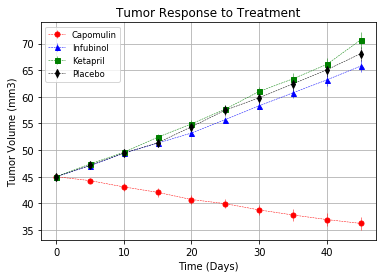

In [10]:
errorbar_attr = {
    'markersize': 5,
    'linestyle': "dashed",
    'linewidth': 0.50,
}
plt.errorbar(
    tumor_volume_avg_pivot.index,
    tumor_volume_avg_pivot["Capomulin"],
    yerr=tumor_volume_sem_pivot["Capomulin"],
    color="r",
    marker="o",
    **errorbar_attr
)
plt.errorbar(
    tumor_volume_avg_pivot.index,
    tumor_volume_avg_pivot["Infubinol"],
    yerr=tumor_volume_sem_pivot["Infubinol"],
    color="b",
    marker="^",
    **errorbar_attr
)
plt.errorbar(
    tumor_volume_avg_pivot.index,
    tumor_volume_avg_pivot["Ketapril"],
    yerr=tumor_volume_sem_pivot["Ketapril"],
    color="g",
    marker="s",
    **errorbar_attr
)
plt.errorbar(
    tumor_volume_avg_pivot.index,
    tumor_volume_avg_pivot["Placebo"],
    yerr=tumor_volume_sem_pivot["Placebo"],
    color="k",
    marker="d",
    **errorbar_attr
)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

## Survival Rates

In [11]:
survival_count = combined_clinical_data.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
survival_count_df = pd.DataFrame(survival_count)
survival_count_df = survival_count_df.reset_index()
survival_count_df_pivot = survival_count_df.pivot(index='Timepoint', columns='Drug')['Mouse ID']

In [12]:
# survival_count_df_pivot_normalized = survival_count_df_pivot.apply(
#     lambda row: row/25
# )
survival_count_df_pivot_normalized = survival_count_df_pivot.div(
    survival_count_df_pivot.iloc[0,:].values
)
survival_count_df_pivot_normalized

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1.00,1.000000,1.00
5,1.00,0.84,1.00,0.92,0.92,0.96,0.961538,1.00,0.961538,0.96
10,1.00,0.80,0.84,0.88,0.84,0.96,0.884615,0.96,0.884615,0.88
15,0.96,0.76,0.84,0.76,0.84,0.80,0.653846,0.96,0.884615,0.84
20,0.92,0.72,0.80,0.76,0.80,0.76,0.653846,0.92,0.807692,0.68
25,0.88,0.72,0.72,0.76,0.72,0.68,0.538462,0.92,0.730769,0.64
30,0.88,0.64,0.68,0.72,0.60,0.60,0.500000,0.92,0.692308,0.60
35,0.88,0.56,0.48,0.68,0.60,0.56,0.384615,0.84,0.615385,0.56
40,0.84,0.56,0.40,0.60,0.60,0.48,0.346154,0.80,0.461538,0.56


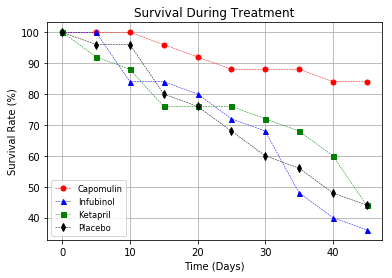

In [13]:
plot_attr = {
    'linestyle': 'dashed',
    'markersize': 5,
    'linewidth': 0.50,
}
plt.plot(
    100 * survival_count_df_pivot_normalized["Capomulin"],
    "ro", 
    **plot_attr
)
plt.plot(
    100 * survival_count_df_pivot_normalized["Infubinol"],
    "b^",
    **plot_attr,
)
plt.plot(
    100 * survival_count_df_pivot_normalized["Ketapril"],
    "gs",
    **plot_attr
)
plt.plot(
    100 * survival_count_df_pivot_normalized["Placebo"],
    "kd",
    **plot_attr
)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()